In [4]:
import pandas as pd

In [21]:
df = pd.read_csv('Billionaires Statistics Dataset.csv')

In [15]:
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


INSTALAR MATPLOTLIB EN CMD DE WINDOWS (pip install matplotlib)

In [9]:
import matplotlib.pyplot as plt

MOSTRAR LA CANTIDAD DE BILLONARIOS SEGUN SU EDAD (EN RANGOS DE 10 AÑOS)

In [22]:
rangos = [str(i) + '-' + str(i+9) for i in range(0, 100, 10)]

In [13]:
edades = df['age']

In [23]:
qtt_edad = [((edades >= i) & (edades < i+10)).sum() for i in range(0, 100, 10)]

Text(0.5, 1.0, 'Distribución de Edades')

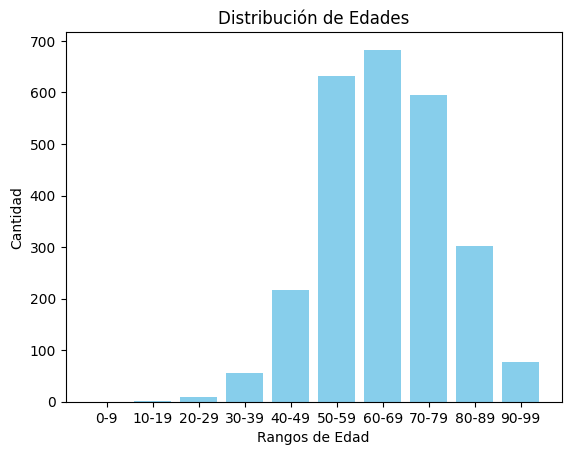

In [29]:
plt.bar(rangos, qtt_edad, color='skyblue')
plt.xlabel('Rangos de Edad')
plt.ylabel('Cantidad')
plt.title('Distribución de Edades')

La mayoria de los millonarios estan en su avanzada adultez, en sus 60.

MOSTRAR LA CANTIDAD DE BILLONARIOS POR PAIS DE RESIDENCIA

In [31]:
qttPerPais = df['country'].value_counts()

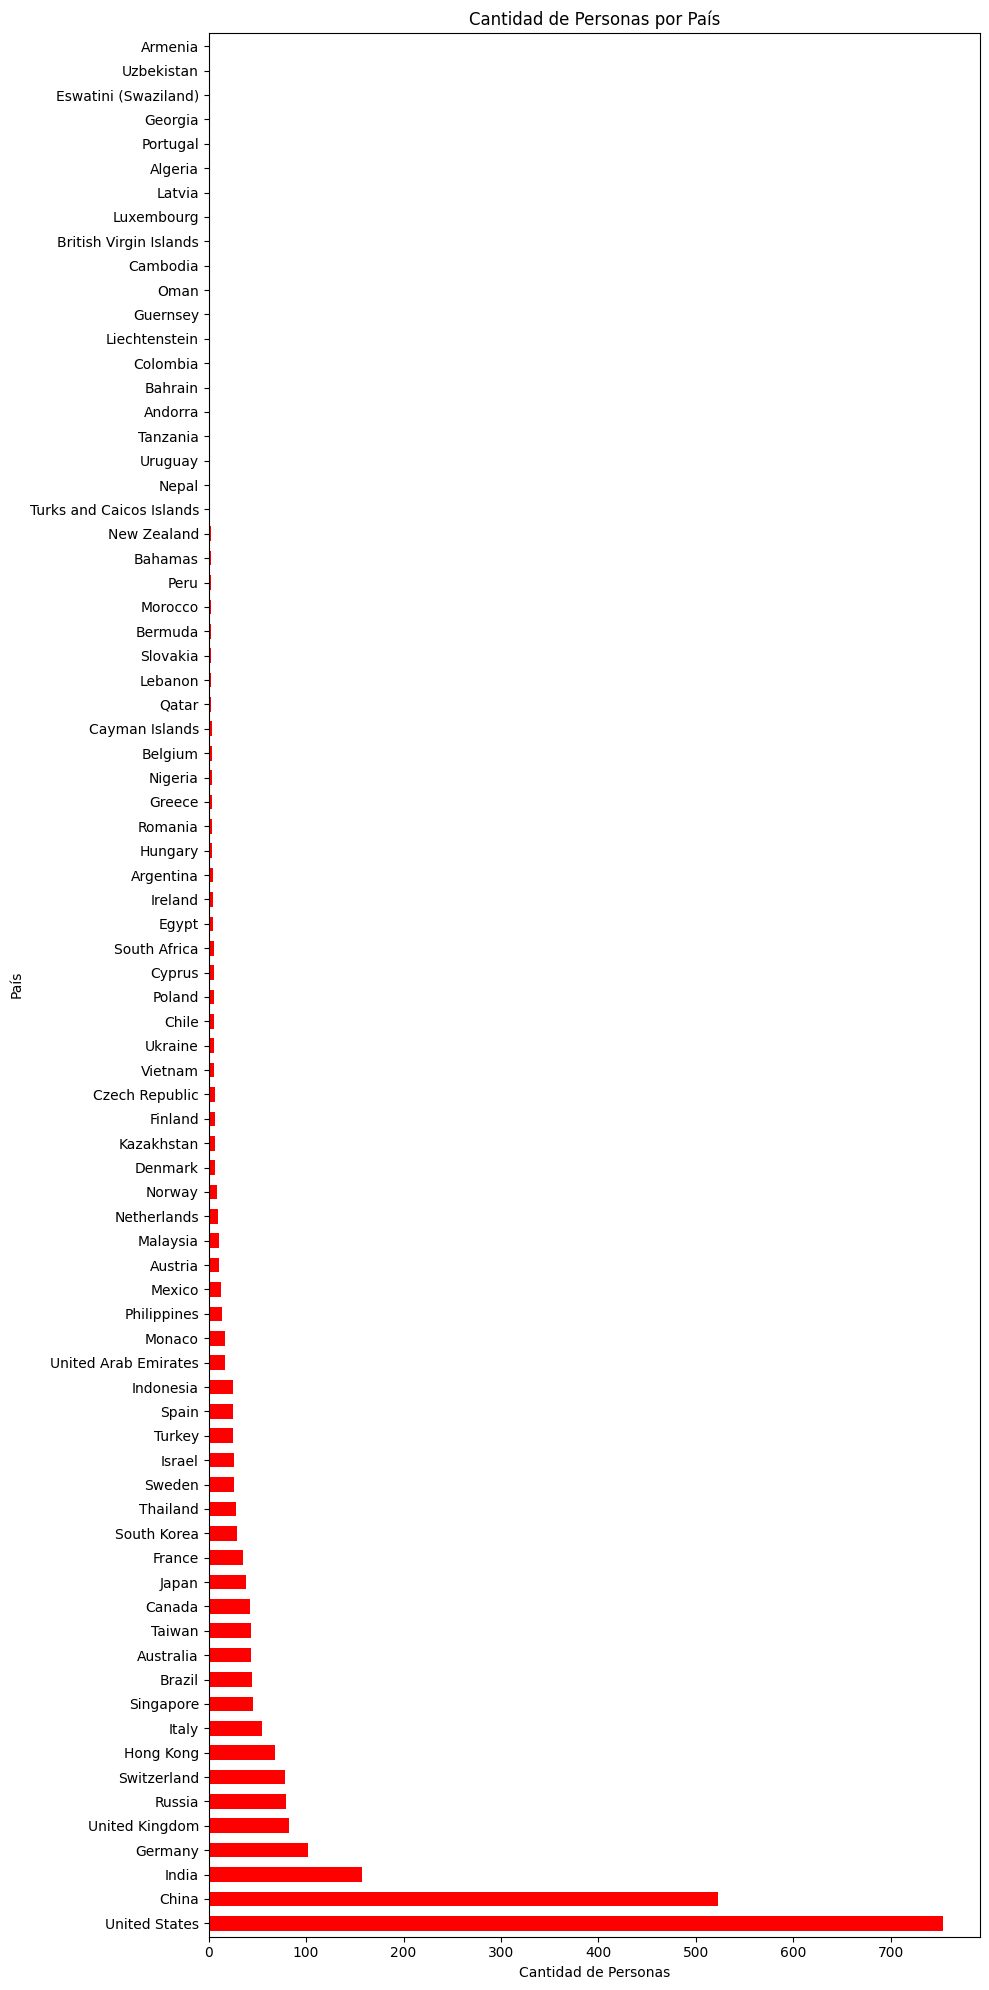

In [49]:
plt.figure(figsize=(10, 20))
qttPerPais.plot(kind='barh', color='red', width=0.6)
plt.xlabel('Cantidad de Personas')
plt.ylabel('País')
plt.title('Cantidad de Personas por País de Residencia')
plt.tight_layout()
plt.show()

Estados Unidos es el país donde viven mas millonarios, seguido de china con una diferencia de 200 y el siguiente es Indidia que con respecto al primero encontramos una diferencia de 600.

MOSTRAR LA CANTIDAD DE BILLONARIOS POR PAIS DE ORIGEN

In [51]:
qttPerPaisOrigen = df['countryOfCitizenship'].value_counts()

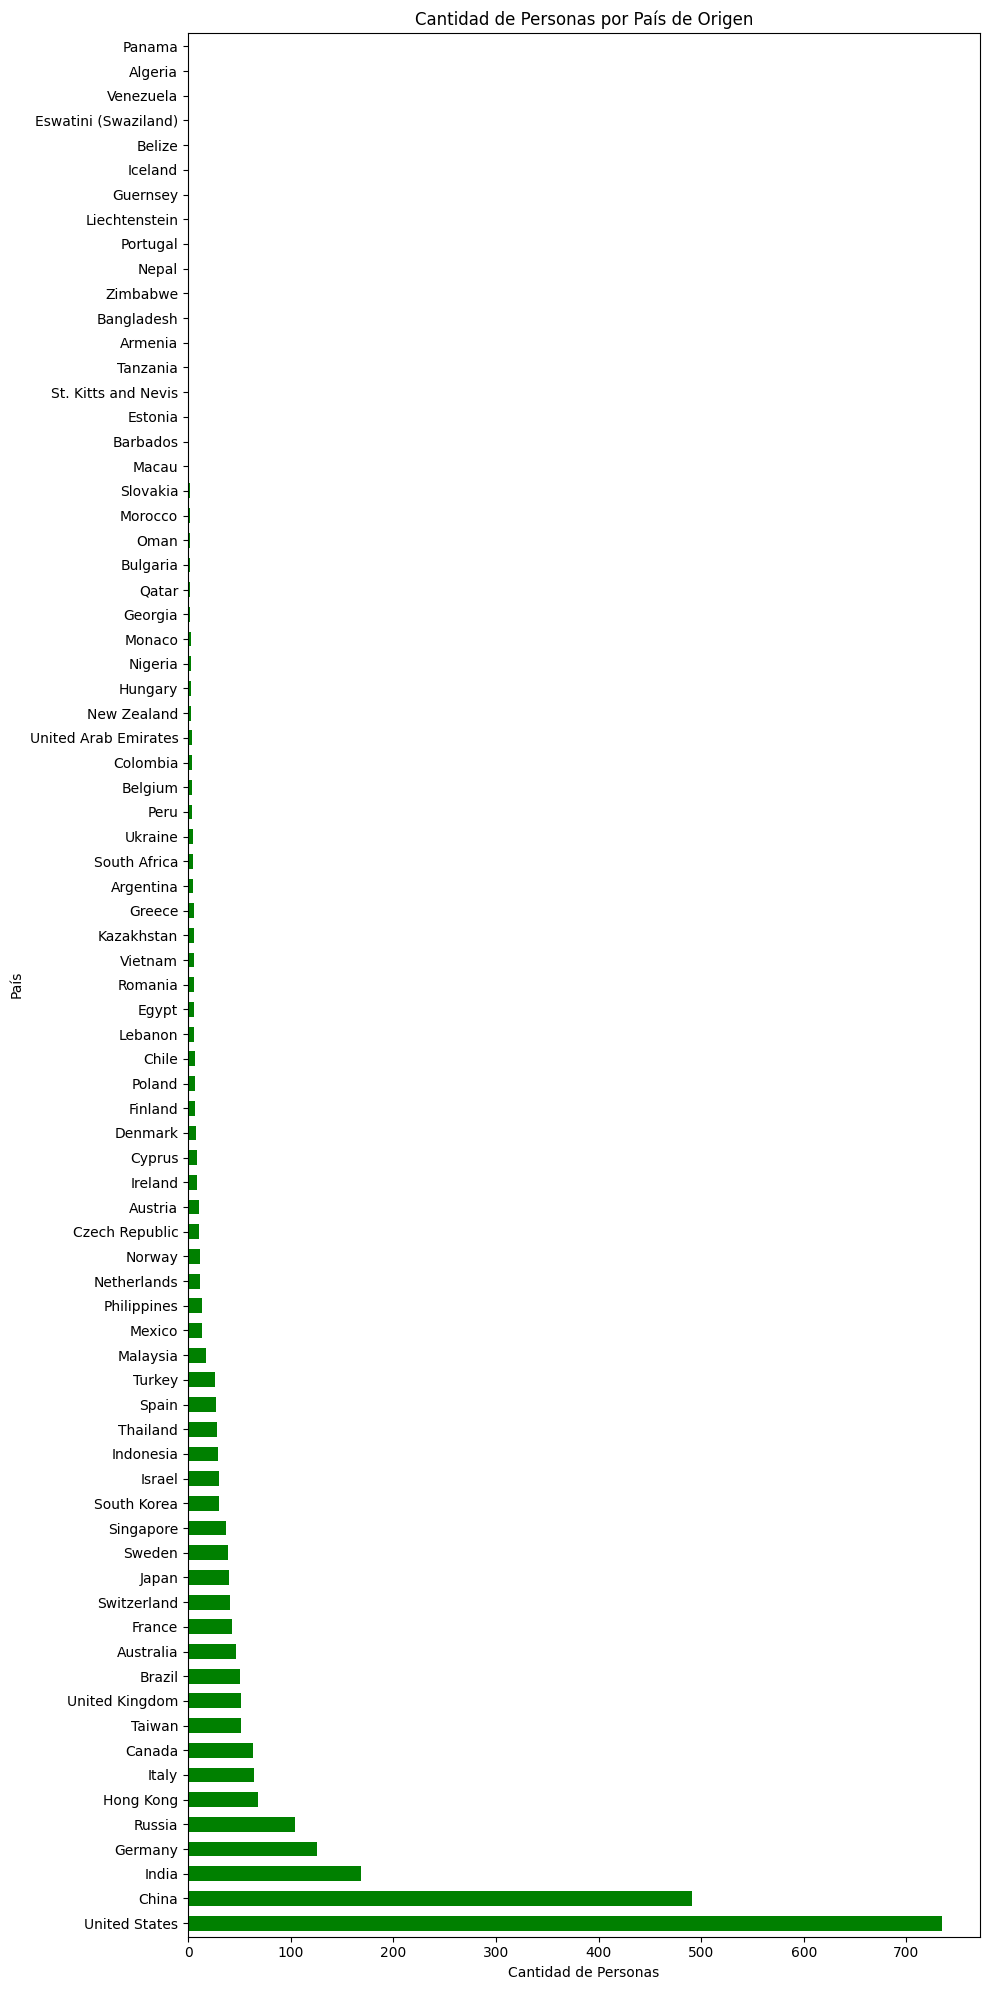

In [53]:
plt.figure(figsize=(10, 20))
qttPerPaisOrigen.plot(kind='barh', color='green', width=0.6)
plt.xlabel('Cantidad de Personas')
plt.ylabel('País')
plt.title('Cantidad de Personas por País de Origen')
plt.tight_layout()
plt.show()

El podio lo siguen ocupando los mismos 3 paises aunque vemos que china ha bajado unos 50 puntos. Los otros 2 se mantienen

PAIS DE ORIGEN Y PAIS DE RESIDENCIA

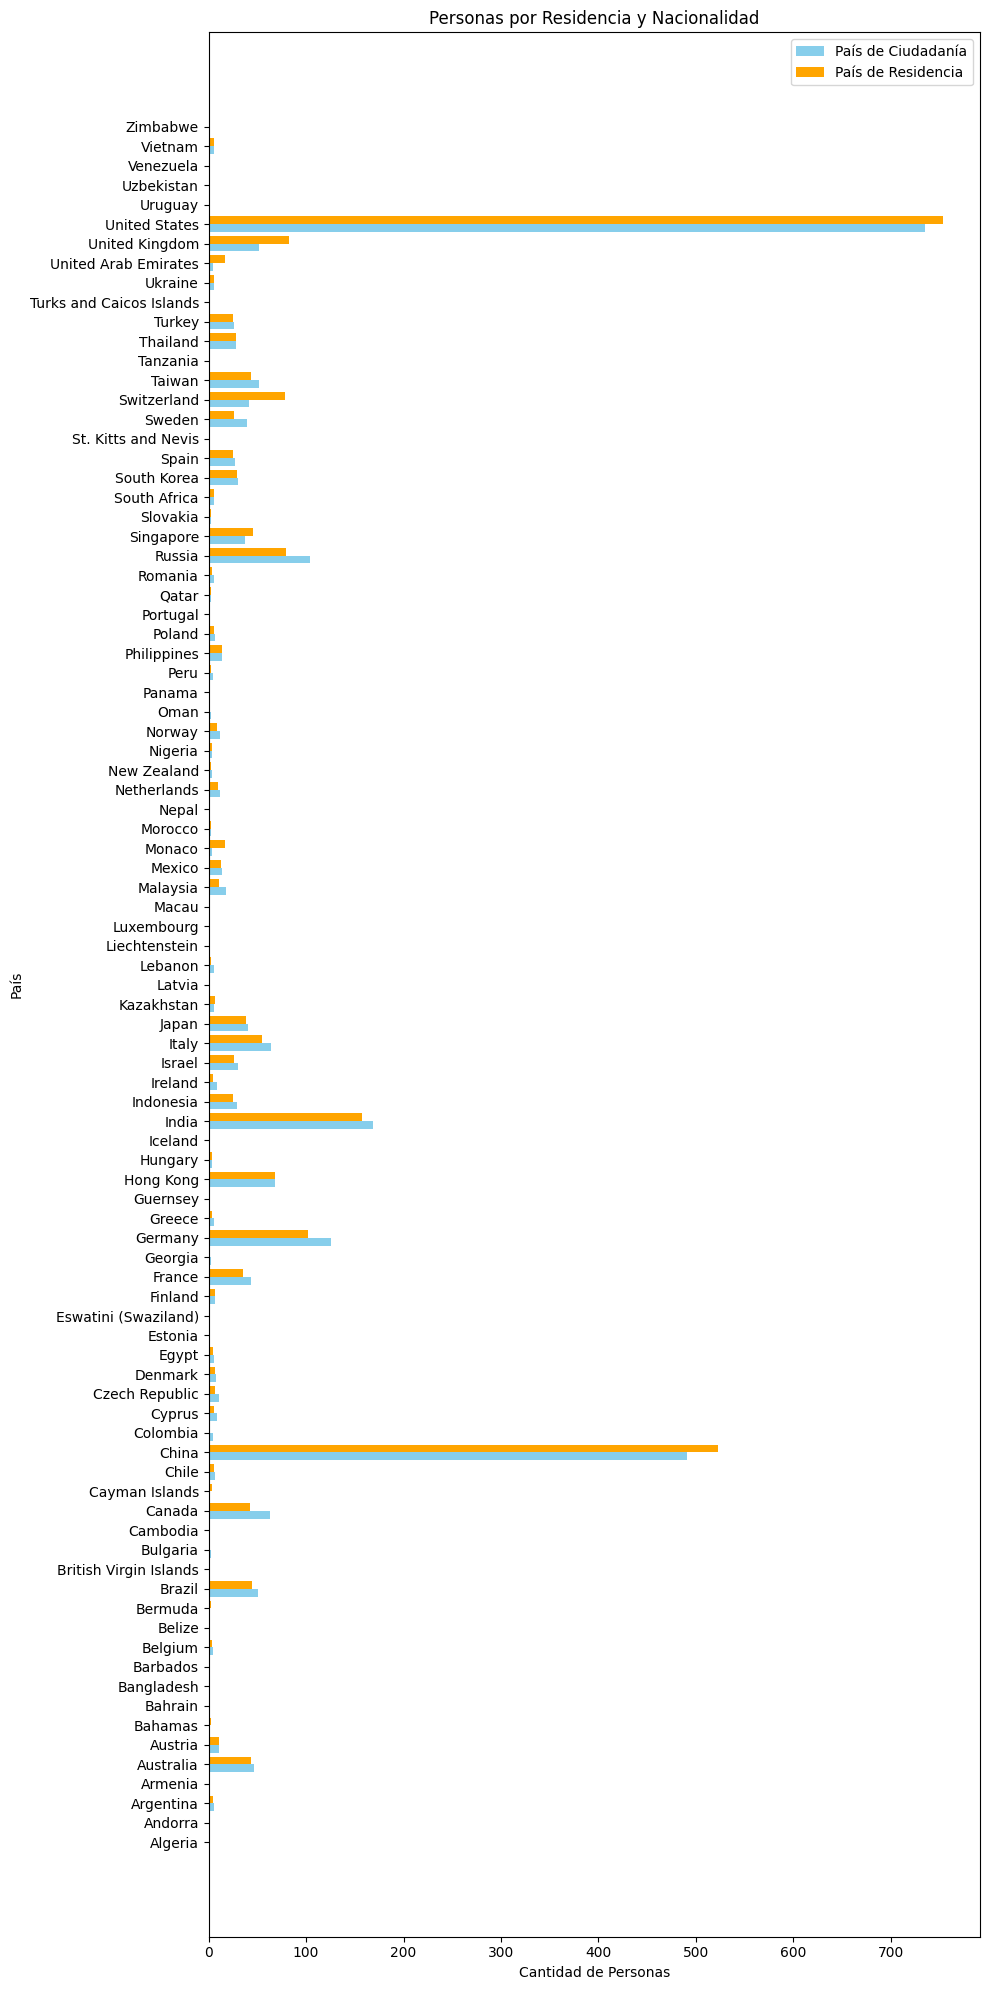

In [59]:
paises = sorted(set(qttPerPaisOrigen.index) | set(qttPerPais.index))
PerXpaisOr = [qttPerPaisOrigen.get(pais, 0) for pais in paises]
perXpaisRes = [qttPerPais.get(pais, 0) for pais in paises]
y_pos = range(len(paises))
bar_width = 0.4
fig, ax = plt.subplots(figsize=(10, 20))

ax.barh(y_pos, PerXpaisOr, height=bar_width, color='skyblue', label='País de Ciudadanía')

ax.barh([pos + bar_width for pos in y_pos], perXpaisRes, height=bar_width, color='orange', label='País de Residencia')

ax.set_yticks([pos + bar_width / 2 for pos in y_pos])
ax.set_yticklabels(paises)
ax.set_xlabel('Cantidad de Personas')
ax.set_ylabel('País')
ax.set_title('Personas por Residencia y Nacionalidad')
ax.legend()

plt.tight_layout()
plt.show()

Podem observar la unió de les 2 anteriors gràfiques

DIFERENCIA ENTRE RESIDENTS I LA SEVA NACIONALITAT

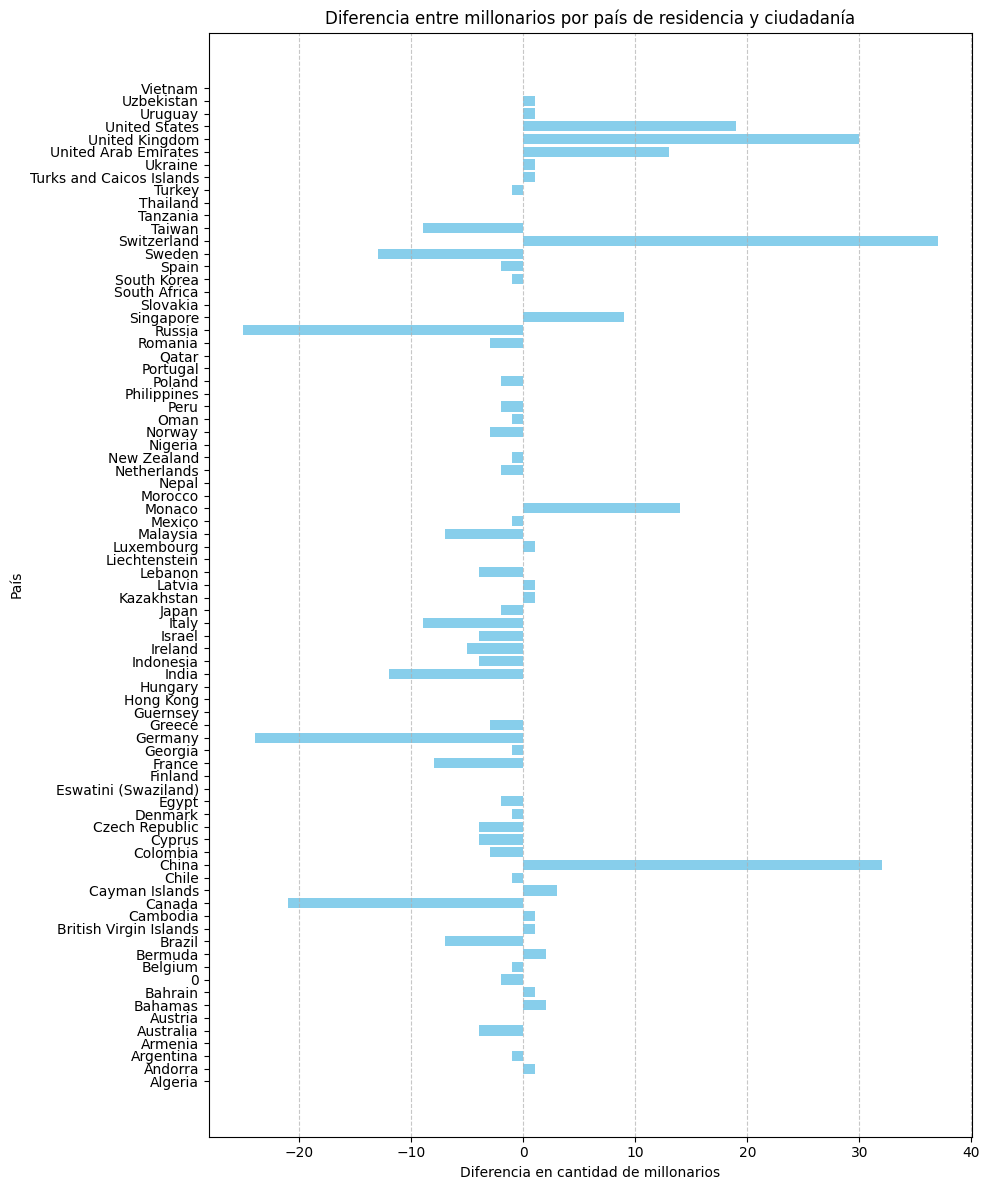

In [21]:
import matplotlib.pyplot as plt
millonarios_por_pais = df.groupby('country').size().reset_index(name='millonarios_residencia')

millonarios_por_pais = df.groupby('country').size().reset_index(name='millonarios_residencia')

# Calcular el número total de millonarios por país de ciudadanía
millonarios_por_ciudadania = df.groupby('countryOfCitizenship').size().reset_index(name='millonarios_ciudadania')

# Fusionar los dos dataframes en uno solo usando el país como clave
merged = pd.merge(millonarios_por_pais, millonarios_por_ciudadania, left_on='country', right_on='countryOfCitizenship', how='outer')

# Llenar los valores NaN con 0
merged.fillna(0, inplace=True)

# Calcular la diferencia entre millonarios por país de residencia y ciudadanía
merged['diferencia'] = merged['millonarios_residencia'] - merged['millonarios_ciudadania']

# Convertir la columna 'country' a string
merged['country'] = merged['country'].astype(str)

# Crear el gráfico de barras horizontal con cuadrícula de fondo y mayor espaciado
plt.figure(figsize=(10, 12))
plt.barh(merged['country'], merged['diferencia'], color='skyblue')
plt.title('Diferencia entre millonarios por país de residencia y ciudadanía')
plt.xlabel('Diferencia en cantidad de millonarios')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

----> Observamos que con diferencia a donde se van mas millonarios es a Suiza, China y Estados Unidos, mientras que los paises de donde se van son Russia Alemania y Canadà.

----> POBLACION DE SUIZA: 8776000

----> POBLACION DE RUSIA: 144200000

In [25]:
millonarios_en_suiza = df[df['country'] == 'Switzerland'].shape[0]

# Población actual de Suiza
poblacion_suiza = 8776000

# Calcular el porcentaje de millonarios en Suiza
porcentaje_millonarios_suiza = (millonarios_en_suiza / poblacion_suiza) * 100000

print("Porcentaje de millonarios en Suiza:", porcentaje_millonarios_suiza)

Porcentaje de millonarios en Suiza: 0.8887876025524156


In [29]:
millonarios_en_russia = df[df['country'] == 'Russia'].shape[0]

# Población actual de Russia
poblacion_russia = 144200000

# Calcular el porcentaje de millonarios en Russia
porcentaje_millonarios_russia = (millonarios_en_russia / poblacion_russia) * 100000

print("Porcentaje de millonarios en Russia:", porcentaje_millonarios_russia)

Porcentaje de millonarios en Russia: 0.054785020804438284


----> Hay mas de 10 veces mas porcentage de millonarios en suiza que en rusia

In [28]:
millonarios_de_suiza = df[df['countryOfCitizenship'] == 'Switzerland'].shape[0]

# Población actual de Suiza
poblacion_suiza = 8776000

# Calcular el porcentaje de millonarios en Suiza
porcentaje_millonarios_suiza = (millonarios_de_suiza / poblacion_suiza) * 100000

print("Porcentaje de millonarios de Suiza:", porcentaje_millonarios_suiza)

Porcentaje de millonarios de Suiza: 0.46718322698268006


----> Son la mitad de los residentes, x lo tanto la mitad de los millonarios en suiza no son de suiza originalmente

In [30]:
millonarios_de_russia = df[df['countryOfCitizenship'] == 'Russia'].shape[0]

# Población actual de Russia
poblacion_russia = 144200000

# Calcular el porcentaje de millonarios en Russia
porcentaje_millonarios_russia = (millonarios_de_russia / poblacion_russia) * 100000

print("Porcentaje de millonarios de Russia:", porcentaje_millonarios_russia)

Porcentaje de millonarios de Russia: 0.07212205270457697


----> Una 3ª parte de los millonarios Russos se van a vivir fuera de su país

---> CALCULAMOS LA TASA IMPOSITIVA POR PAIS Y AGRUPAMOS:


In [23]:
# Agrupar los datos por país y calcular el promedio de la tasa impositiva
tabla_tasa_impositiva = df.groupby('country')['total_tax_rate_country'].mean().reset_index()

# Eliminar filas con valores NaN en la columna 'total_tax_rate_country'
tabla_tasa_impositiva = tabla_tasa_impositiva.dropna(subset=['total_tax_rate_country'])

# Ordenar la tabla por la columna 'total_tax_rate_country' en orden ascendente
tabla_tasa_impositiva = tabla_tasa_impositiva.sort_values(by='total_tax_rate_country', ascending=True)

# Mostrar la tabla resultante
print(tabla_tasa_impositiva)

                 country  total_tax_rate_country
25               Georgia                     9.9
56                 Qatar                    11.3
7                Bahrain                    13.8
72  United Arab Emirates                    15.9
57               Romania                    20.0
..                   ...                     ...
24                France                    60.7
10                Brazil                    65.1
0                Algeria                    66.1
17              Colombia                    71.2
2              Argentina                   106.3

[66 rows x 2 columns]


---> MOSTRAMOS TODAS LAS FILAS:


In [24]:
# Configurar pandas para mostrar todas las filas sin truncar
pd.set_option('display.max_rows', None)

# Mostrar la tabla resultante
print(tabla_tasa_impositiva)


                 country  total_tax_rate_country
25               Georgia                     9.9
56                 Qatar                    11.3
7                Bahrain                    13.8
72  United Arab Emirates                    15.9
57               Romania                    20.0
41            Luxembourg                    20.4
59             Singapore                    21.0
40         Liechtenstein                    21.6
18                Cyprus                    22.4
3                Armenia                    22.6
12              Cambodia                    23.1
20               Denmark                    23.8
13                Canada                    24.5
34                Israel                    25.3
51                  Oman                    27.4
37            Kazakhstan                    28.4
65           Switzerland                    28.8
61          South Africa                    29.2
68              Thailand                    29.5
32             Indon

---> Conclusiones:
Respecto al grafico de arriba, vemos que los millonarios a los paises que mas se van son:
    
Estados Unidos
Suiza.
Reino Unido.
Emiratos Arabes.
China.

Pero, haciendo el calculo de la tasa impositiva vemos que tenemos mucha diferencia entre un pais y otro:
    
Estados Unidos: 36.6
Suiza: 28.8
Reino Unido: 30.6
Emiratos Arabes: 15.9
China: 59.2


La diferencia en las tasas impositivas entre países puede ser el resultado de una variedad de factores, que incluyen políticas fiscales, estructuras económicas, niveles de desarrollo, estabilidad política y otros factores contextuales.

Por ejemplo, por lo que hemos visto de Suiza es la alta confidencialidad que tiene el pais. Estados Unidos no posee tanta confidencialidad pero en cambio ofrece grandes oportunidades de inversión, un marco político muy estable que proporciona un entorno seguro para negocios e inversiones. China está teniendo un crecimiento económico muy grande y es una buena opción para expandir negocios. Emirates Arabes ofrece varios beneficios fiscales y facilidades para los negocios.

En conclusión, pese a las diferencias en cuanto a tasas en los diferentes paises, son distintas las razones por las que los millonarios eligen uno u otro pais y es muy dificil poder decir exactamente porque se han ido a un pais u otro.

PORCENTAJE DE PIB QUE PERTENECE A LA RIQUEZA DE LOS MILLONARIOS

In [22]:
# Asegúrate de que la columna finalWorth esté en formato numérico y multiplícala por 1,000,000
df['finalWorth'] = pd.to_numeric(df['finalWorth'], errors='coerce') * 1_000_000

# Remover los caracteres no numéricos de gdp_country y convertirla a numérico
df['gdp_country'] = df['gdp_country'].replace(r'[\$,]', '', regex=True).astype(float)

# Calcular la riqueza total de los millonarios por país de residencia
riqueza_por_pais = df.groupby('country')['finalWorth'].sum().reset_index(name='total_wealth')

# Obtener el PIB por país (asumiendo que el PIB es el mismo para todos los millonarios en un país)
pib_por_pais = df[['country', 'gdp_country']].drop_duplicates()

# Unir los datos de riqueza con los datos del PIB utilizando una combinación izquierda
merged_df = pd.merge(riqueza_por_pais, pib_por_pais, on='country', how='left')

# Llenar los valores NaN de gdp_country con 0 para evitar errores en el cálculo
merged_df['gdp_country'] = merged_df['gdp_country'].fillna(0)

# Calcular el porcentaje de riqueza de los millonarios con respecto al PIB
merged_df['percentage_of_GDP'] = (merged_df['total_wealth'] / merged_df['gdp_country']) * 100

# Reemplazar valores infinitos (división por cero) con NaN
merged_df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

        country  total_wealth   gdp_country  percentage_of_GDP
44       Monaco   68000000000  7.184844e+09         946.436668
65  Switzerland  409900000000  7.030824e+11          58.300418
1       Andorra    1500000000  3.154058e+09          47.557781
18       Cyprus    9600000000  2.456465e+10          39.080552
59    Singapore  138000000000  3.720625e+11          37.090540
..          ...           ...           ...                ...
55     Portugal    4700000000  2.376861e+11           1.977398
17     Colombia    6400000000  3.238028e+11           1.976512
57      Romania    4800000000  2.500774e+11           1.919405
56        Qatar    3000000000  1.834662e+11           1.635178
52         Peru    2500000000  2.268481e+11           1.102059

[68 rows x 4 columns]


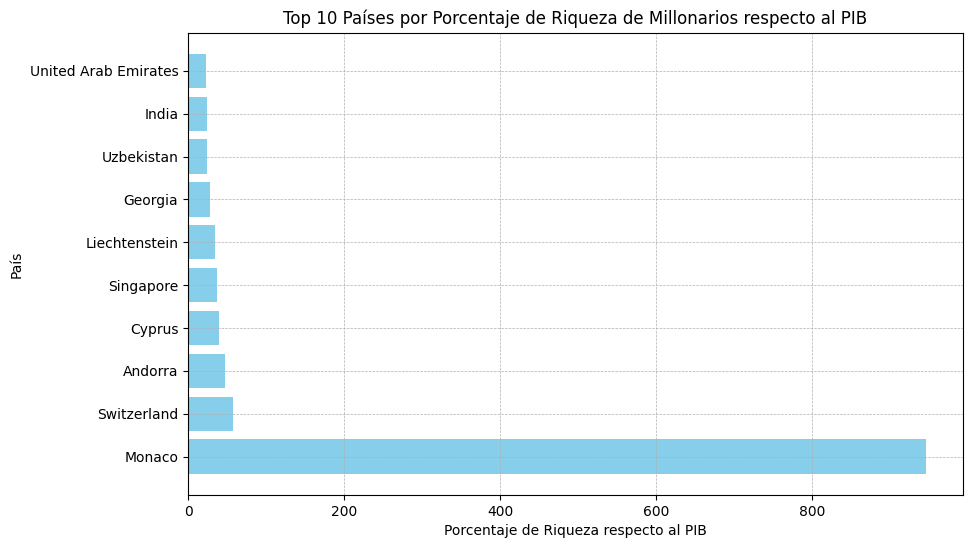

In [20]:
import matplotlib.pyplot as plt
# Filtrar los países con valores NaN en percentage_of_GDP
filtered_df = merged_df.dropna(subset=['percentage_of_GDP'])

# Ordenar los países por porcentaje de riqueza respecto al PIB
sorted_df = filtered_df.sort_values(by='percentage_of_GDP', ascending=False)

# Mostrar los primeros 10 países con el mayor porcentaje de riqueza respecto al PIB
print(sorted_df[['country', 'total_wealth', 'gdp_country', 'percentage_of_GDP']])

# Guardar el DataFrame resultante en un archivo CSV
sorted_df.to_csv('wealth_percentage_of_gdp.csv', index=False)

# Opcional: Crear un gráfico de barras horizontal para los 10 principales países
top_10 = sorted_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10['country'], top_10['percentage_of_GDP'], color='skyblue')
plt.title('Top 10 Países por Porcentaje de Riqueza de Millonarios respecto al PIB')
plt.xlabel('Porcentaje de Riqueza respecto al PIB')
plt.ylabel('País')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

----> Quizas hay algun dato incorrecto en el caso de Monaco o este valor alto puede ser el resultado de varias razones:
1. 
Pequeño tamaño de la economía: Mónaco es un país pequeño con una economía altamente desarrollada, pero su PIB puede ser significativamente menor que la riqueza acumulada de los millonarios que residen all
2. 

Concentración de la riqueza: Mónaco es conocido por tener una alta concentración de riqueza y una gran cantidad de residentes millonarios y multimillonar
3. s.

Flujo de efectivo internacional: Muchos millonarios extranjeros eligen residir en Mónaco debido a su régimen fiscal favorable y otras ventajas, lo que puede aumentar la riqueza total en el país en comparación con su tamaño económico.

----> En el caso de Suiza mas de la mitad de su riqueza corresponde a los millonarios, seguido de Andorra i otros pequeños países.